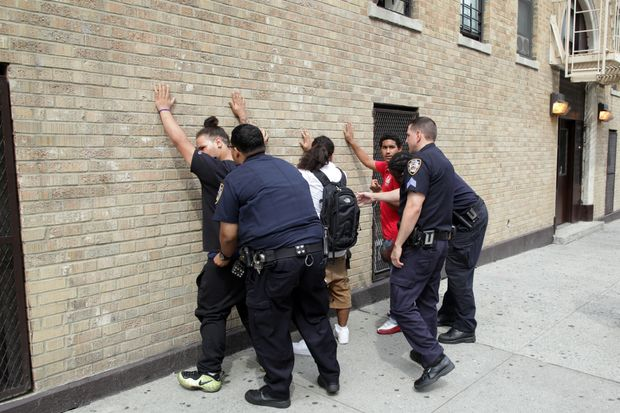
# **Data Analysis Project**
## Members: *Chidvi Doddi, Diana Bui, and Susanna Morin*
## Group name: Rage Against the Machine
## Data set: NYPD 2019 SQF Dataset

## **Objective: Examining fairness definitions**
###We are looking at the NYPD's 2019 Stop, Question, and Frisk Database. Based on an ML model trained with the data, we want to see what fairness definition the NYPD uses in its SQF encounters spanning different racial groups.

The databse contains all of the recorded NYPD stop incidences and details pertaining to each stop. Some of the features recorded include: the description of the suspected crime, whether the officer was wearing a uniform, the suspect's demeanor, and the location of the stop. These incidents were entered manually through an app then they are uploaded automatically into the database. 

The methods, techniques, and terms featured in this project to present our findings are sourced from module 3. 

---
#**Dataset Preprocessing**
This process is comprised of three parts: 
1. Dropping extraneous columns.
> The columns to drop are: 
> 
> STOP_FRISK_ID_ANONY, STOP_FRISK_DATE, STOP_FRISK_TIME, YEAR2,
MONTH2,
DAY2,
STOP_WAS_INITIATED,
RECORD_STATUS_CODE,
ISSUING_OFFICER_RANK,
ISSUING_OFFICER_COMMAND_CODE,
SUPERVISING_OFFICER_RANK,
SUPERVISING_OFFICER_COMMAND_CODE,
LOCATION_IN_OUT_CODE,
JURISDICTION_CODE,
OFFICER_EXPLAINED_STOP_FLAG,
OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION,
SUSPECT_ARREST_OFFENSE,
SUMMONS_ISSUED_FLAG,
SUMMONS_OFFENSE_DESCRIPTION,
OFFICER_IN_UNIFORM_FLAG,
ID_CARD_IDENTIFIES_OFFICER_FLAG,
SHIELD_IDENTIFIES_OFFICER_FLAG,
VERBAL_IDENTIFIES_OFFICER_FLAG,
OTHER_CONTRABAND_FLAG,
FIREARM_FLAG,
KNIFE_CUTTER_FLAG,
OTHER_WEAPON_FLAG,
PHYSICAL_FORCE_CEW_FLAG,
PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG,
PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG,
PHYSICAL_FORCE_OC_SPRAY_USED_FLAG,
PHYSICAL_FORCE_OTHER_FLAG,
PHYSICAL_FORCE_RESTRAINT_USED_FLAG,
PHYSICAL_FORCE_WEAPON_IMPACT_FLAG,
BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG,
BACKROUND_CIRCUMSTANCES_SUSPECT_KNOWN_TO_CARRY_WEAPON_FLAG,
SUSPECTS_ACTIONS_CASING_FLAG,
SUSPECTS_ACTIONS_CONCEALED_POSSESSION_WEAPON_FLAG,
SUSPECTS_ACTIONS_DECRIPTION_FLAG,
SUSPECTS_ACTIONS_DRUG_TRANSACTIONS_FLAG,
SUSPECTS_ACTIONS_IDENTIFY_CRIME_PATTERN_FLAG,
SUSPECTS_ACTIONS_LOOKOUT_FLAG,
SUSPECTS_ACTIONS_OTHER_FLAG,
SEARCH_BASIS_ADMISSION_FLAG,
SEARCH_BASIS_CONSENT_FLAG,
SEARCH_BASIS_HARD_OBJECT_FLAG,
SEARCH_BASIS_OTHER_FLAG,
SEARCH_BASIS_OUTLINE_FLAG,
DEMEANOR_CODE,
DEMEANOR_OF_PERSON_STOPPED,
SUSPECT_REPORTED_AGE,
SUSPECT_HEIGHT,
SUSPECT_WEIGHT,
SUSPECT_EYE_COLOR,
SUSPECT_HAIR_COLOR,
SUSPECT_OTHER_DESCRIPTION,
STOP_LOCATION_PRECINCT,
STOP_LOCATION_APARTMENT,
STOP_LOCATION_FULL_ADDRESS,
STOP_LOCATION_STREET_NAME,
STOP_LOCATION_X,
STOP_LOCATION_Y,
STOP_LOCATION_ZIP_CODE,
STOP_LOCATION_PATROL_BORO_NAME

2. Feature engineering
> For categorical features, convert all string values to numerical values. For Nan and (null) values, populate as '0'. For No, substitute for 1s and Yes to 2s. For other values, map starting from 1. 
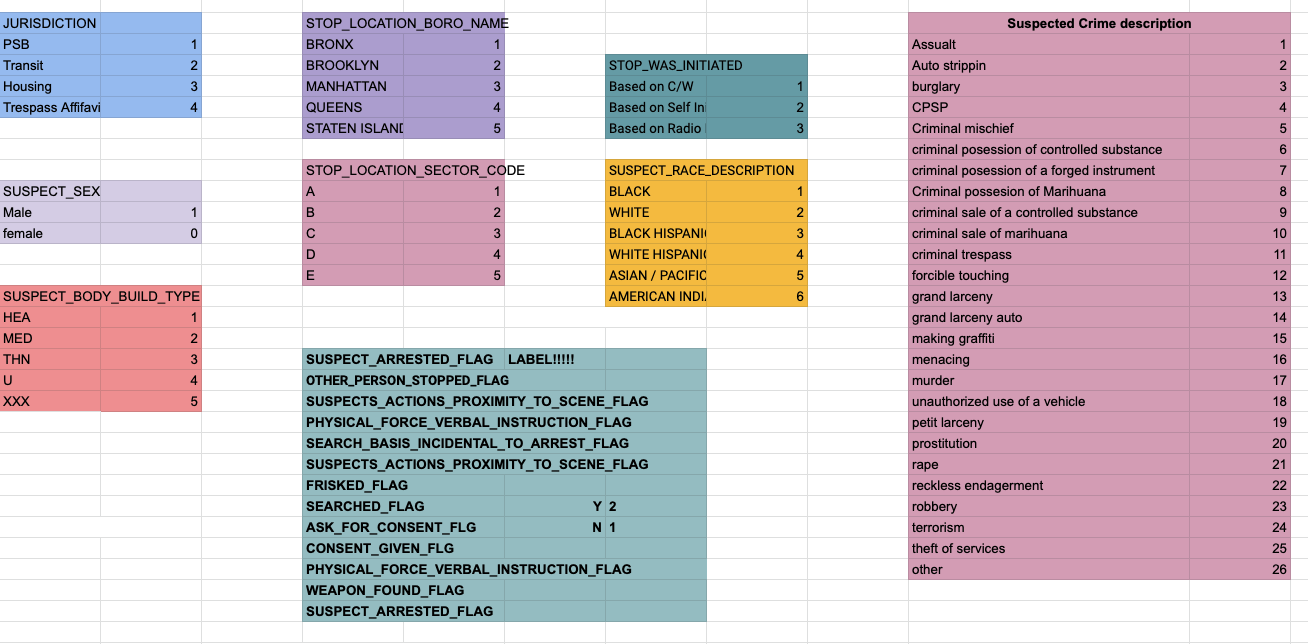
3. Column movement
> Move column "SUSPECT_ARRESTED_FLAG" to the end of dataset. 

For convience and ease, we suggest making these changes in Excel or an equivalent application.

The resulting dataset consists of 20 columns. 



---


# **Onboarding Process**

Below we import in all of the necessary libraries and packages for analysis. Then we load in the preprocessed CSV file as a dataframe. 

In [ ]:
# Pandas, Numpy, Warnings, SciKit Learn, MatplotLib, MLXTEND

import pandas as pd                                      # to read the CSV
import numpy as np                                       # for versatile numpy arrays
import warnings                                          # Suppressing warnings
warnings.filterwarnings('ignore') 
from sklearn.linear_model import LogisticRegression      # log reg for ml model
from sklearn.model_selection import train_test_split     # splits dataset into train and test set
from sklearn import metrics as metrics                   # help plot roc curve
# from sklearn.metrics import ConfusionMatrixDisplay     # display matrix
import matplotlib.pyplot as plt                          # plots matplotlib
from mlxtend.plotting import plot_confusion_matrix       # plots confusion matrix

In [ ]:
# read the csv file and create dataframes:

data = pd.read_csv("NYPD2019.csv")
data = data.fillna(value = 0)                            #fill Nan values with 0, doing it here takes less effort
data.head()
#data.shape #(13459, 20)

,STOP_WAS_INITIATED,JURISDICTION_DESCRIPTION,OBSERVED_DURATION_MINUTES,SUSPECTED_CRIME_DESCRIPTION,STOP_DURATION_MINUTES,OTHER_PERSON_STOPPED_FLAG,FRISKED_FLAG,SEARCHED_FLAG,ASK_FOR_CONSENT_FLG,CONSENT_GIVEN_FLG,WEAPON_FOUND_FLAG,PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG,SUSPECTS_ACTIONS_PROXIMITY_TO_SCENE_FLAG,SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_BODY_BUILD_TYPE,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_BORO_NAME,SUSPECT_ARRESTED_FLAG
0,3,0.0,3,13.0,14,1,2,2,0.0,0.0,1,2.0,0.0,0.0,2.0,4.0,4.0,3.0,3,1
1,1,1.0,1,0.0,3,1,2,1,2.0,2.0,1,2.0,0.0,0.0,1.0,1.0,3.0,2.0,3,1
2,3,1.0,1,1.0,10,1,2,1,1.0,1.0,1,2.0,2.0,0.0,2.0,1.0,2.0,3.0,2,1
3,2,3.0,1,0.0,10,1,2,1,1.0,1.0,1,2.0,0.0,0.0,2.0,1.0,2.0,1.0,2,1
4,3,3.0,1,23.0,20,2,2,1,2.0,2.0,1,2.0,0.0,0.0,2.0,4.0,3.0,3.0,4,1


## Type Conversion
Now transform the Dataframe into Numpy arrays. This makes it easier for us throughout the analysis. 


In [ ]:
dataX = data.values[:, :19]             # feature vectors
dataY = data.values[:, -1:].ravel()     # target label: "SUSPECT_ARRESTED_FLAG"



---
#**Training and Predicting with the Machine Learning Model**
## For our purposes, we chose a logistic regression model. We felt this was an appropriate choice for a multitude of reasons (time, context of the data, etc.). 


## Here is the splitting of the dataset and training and fitting of the logistic regression model. 

The train : test split is 80:20 and we set the random state for train_test_split as 123. The splits is stratified on the target label and printout shows split is representative of dataset. 

Variables:


*   dataX_train: features training set
*   dataX_test:  features test set
*   dataY_train: label training set
*   dataY_test:  label test set
*   y_hat_score: logistic regression model



In [ ]:
dataX_train, dataX_test, dataY_train, dataY_test = train_test_split(dataX, dataY, test_size = 0.2, stratify = dataX[:, 15:16], random_state = 123)

reg = LogisticRegression()

reg.fit(dataX_train,dataY_train)       # training model with training data set
y_hat_score = reg.predict(dataX_test)  # model predicting with test data set




---


# **Fairness Definitions**

In module 3, we learned a handful of the many definitions of fairness. For the purpose of this project, we investigated only 2 of the definitions: **Predictive Rate Parity** and **Demographic Parity**. To help us, we will be utilizing tools and concepts presented in Lab 3.

We attempted to uncover which fairness definition the NYPD operates with in mind. We did this by performing error analyses with our trained logistic regression model.

### **Splitting dataX by Racial Group**
In the following box, we have derived a function called "split_on_feature" that returns feature vector and label arrays populated with the feature vectors of the corresponding race. We use these arrays to predict on our model.

There are 6 racial groups in the dataset: Black, White, Black Hispanic, White Hispanic, Asian and Pacific Islander, and Native American Indian. This feature is in the 16th column (index 15). 

In [ ]:
# if for race column ex. split on {1, 2, 3, 4, 5, 6}
# SUSPECT_RACE_DESCRIPTION
# column index 15

def split_on_feature(dataX, dataY):
    rows_black = []          #1:BLACK
    rows_white = []          #2: WHITE
    rows_black_hispanic = [] #3: BLACK HISPANIC
    rows_white_hispanic = [] #4: WHITE HISPANIC
    rows_asian_pacific = []  #5: ASIAN / PACIFIC ISLANDER
    rows_na_indian = []      #6: AMERICAN INDIAN/ALASKAN N(ATIVE)
    
    #looking through data and recording features w/r to race
    for i in range(dataX.shape[0]):
        if dataX[i, 15] == 1:
            rows_black.append(i)
        elif dataX[i, 15] == 2:
            rows_white.append(i)
        elif dataX[i, 15] == 3:
            rows_black_hispanic.append(i)
        elif dataX[i, 15] == 4:
            rows_white_hispanic.append(i)
        elif dataX[i, 15] == 5:
            rows_asian_pacific.append(i)
        else: # if dataX[i, 15] == 6
            rows_na_indian.append(i)

    # selecting rows and placing them into their own np.arrays
    #dataX values
    X_black = dataX[rows_black, :]
    X_white = dataX[rows_white, :]
    X_black_hispanic = dataX[rows_black_hispanic, :]
    X_white_hispanic = dataX[rows_white_hispanic, :]
    X_asian_pacific = dataX[rows_asian_pacific, :]
    X_na_indian = dataX[rows_na_indian, :]

    #dataY values
    Y_black = dataY[rows_black]
    Y_white = dataY[rows_white]
    Y_black_hispanic = dataY[rows_black_hispanic]
    Y_white_hispanic = dataY[rows_white_hispanic]
    Y_asian_pacific = dataY[rows_asian_pacific]
    Y_na_indian = dataY[rows_na_indian]

    
    return X_black, X_white, X_black_hispanic, X_white_hispanic, X_asian_pacific, X_na_indian, Y_black, Y_white, Y_black_hispanic, Y_white_hispanic, Y_asian_pacific, Y_na_indian


### Variables

*   y_hat_black: model predicted with Black people
*   y_hat_white: model predicted with White people
*   y_hat_black_his: model predicted with Black Hispanic people
*   y_hat_white_his: model predicted with White Hispanic people
*   y_hat_asian_pa: model predicted with Asian and Pacific Islander people
*   y_hat_na_indi: model predicted with Native American Indian people

In [ ]:
# splitting up the data
# this line is atrocious but no way around it
X_black, X_white, X_black_hispanic, X_white_hispanic, X_asian_pacific, X_na_indian, Y_black, Y_white, Y_black_hispanic, Y_white_hispanic, Y_asian_pacific, Y_na_indian = split_on_feature(dataX_test, dataY_test)

# predict on model with the arrays
y_hat_black = reg.predict(X_black)
y_hat_white = reg.predict(X_white)
y_hat_black_his = reg.predict(X_black_hispanic)
y_hat_white_his = reg.predict(X_white_hispanic)
y_hat_asian_pa = reg.predict(X_asian_pacific)
y_hat_na_indi = reg.predict(X_na_indian)


# **Predictive Rate Parity**
This is the first fairness definition we examined. In essence, this definition is satisfied when all groups in the protected attribute of the dataset have the same probability of a subject with a positive predicted value (PPV) to truly belong to the positive class. This also true for the negative case (FDR). 

We chose this definition because we believe precision in sensitve situations like a stop and frisk is very important. The precision across each racial groups should be the same to be fair.

### **Predictive Rate Parity Error**
For a group G, true classification Y, and classifier output Y', we calculated the error using the formula

### ∑𝑦|𝑃(Y = y|G = 1, Y' = 𝑦)− 𝑃(Y = y|G = 2, Y' = 𝑦) - ... - 𝑃(Y = y|G = 6, Y' = 𝑦)|

The following code defines a function called "PPV_FDR" that returns the proportion of a subject with a positive predicted value to truly belong to the positive class in a racial group. It also returns the negative case. This function helps calculate the **predictive rate parity error** (2nd box). 

In [ ]:
# calculates ppv and fdr of a race group
# less cluttered code than doing all in one single function
def PPV_FDR(y_hat, y):
    yes = 0
    no = 0;

    for i in range(len(y_hat)):
        if (y_hat[i]==1 and y[i]==1):
            no += 1
        if (y_hat[i]==2 and y[i]==2):
            yes += 1

    throwaway, counts = np.unique(y_hat, return_counts = True)
    no_count, yes_count = counts[0], counts[1]

    count_one_hat = yes/yes_count #ppv
    count_zero_hat = no/no_count  #fdr

    return count_one_hat, count_zero_hat


In [ ]:
#calculating ppv and fdr for each race group
ppv_black, fdr_black = PPV_FDR(y_hat_black, Y_black)
ppv_white, fdr_white = PPV_FDR(y_hat_white, Y_white)
ppv_black_his, fdr_black_his = PPV_FDR(y_hat_black_his, Y_black_hispanic)
ppv_white_his, fdr_white_his = PPV_FDR(y_hat_white_his, Y_white_hispanic)
ppv_asian_pa, fdr_asian_pa = PPV_FDR(y_hat_asian_pa, Y_asian_pacific)
ppv_na_indi, fdr_na_indi = PPV_FDR(y_hat_na_indi, Y_na_indian)

#calculating predictive parity error
predictive_parity_err = np.abs(fdr_black - fdr_white - fdr_black_his - fdr_white_his - fdr_asian_pa - fdr_na_indi)
print(fdr_black, fdr_white, fdr_black_his, fdr_white_his, fdr_asian_pa, fdr_na_indi)
#print(predictive_parity_err)
predictive_parity_err += np.abs(ppv_black - ppv_white - ppv_black_his - ppv_white_his - ppv_asian_pa - ppv_na_indi)
print(ppv_black, ppv_white, ppv_black_his, ppv_white_his, ppv_asian_pa, ppv_na_indi)

#if definition is followed, should be near 0
#display error
print("The predictive rate parity error for this model is", predictive_parity_err)

0.7442244224422442 0.75 0.7888888888888889 0.7669491525423728 0.7931034482758621 0.75
3.10471706726488
0.3939393939393939 0.38461538461538464 0.362962962962963 0.38977635782747605 0.3548387096774194 0.5454545454545454
The predictive rate parity error for this model is 4.748425633863274


# **Demographic Parity**
Then we examined if the model followed the definition of Demogrpahic Parity. This definition strives for an equal probability of a subject being assigned to the positive prediction class across/for all groups in the protected attribute. Lab 3 says the demographic parity is "the ratio of the group in the whole population will be the same as the ratio of the group in the predicted classes". 

We chose this definition because it is supported legally by what is called the "four-fifth rule" (discussed in the article linked above). This in conjunction with the fact this is the NYPD, a government agency, we felt it was necessary to evaluate the model with this definition. 

### **Demographic Parity Error**
For a group G and classifier Y, we calculated the demographic parity error using the following formula

### ∑𝑔,𝑦|𝑃(𝐺 = 𝑔|Y = 𝑦) − 𝑃(𝐺 = 𝑔)|

We followed the same process as we did for Predictive Rate Parity. We first defined a function called "demographic_parity_error" to calculate the **demographic parity error** for a specific group. This helped us shorten the process of finding the total error (process in 2nd box).

In [ ]:
# args: 
# y_hat is predicted values
# y_no is number of NO/1 predicted
# y_yes is number of YES/2 predicted

# to make things easier, function only calculates dpe for one group
def demographic_parity_error(y_hat, y_no, y_yes): 
    #error can be more than 1
    #g = 1, ... 6
    
    num_ppl = len(y_hat)
    prob_ppl = len(y_hat)/(y_no + y_yes) #number of feature vectors in test set
    ppl_given_yes = num_ppl/y_yes
    ppl_given_no = num_ppl/y_no
    
    dp_error = np.abs(ppl_given_no - prob_ppl) + np.abs(ppl_given_yes - prob_ppl)
    
    return dp_error


In [ ]:
#calculating p(Y = 1, 0)
throwaway, counts = np.unique(y_hat_black, return_counts = True)
black_no, black_yes = counts[0], counts[1]
throwaway, counts = np.unique(y_hat_white, return_counts = True)
white_no, white_yes = counts[0], counts[1]
throwaway, counts = np.unique(y_hat_black_his, return_counts = True)
black_his_no, black_his_yes = counts[0], counts[1]
throwaway, counts = np.unique(y_hat_white_his, return_counts = True)
white_his_no, white_his_yes = counts[0], counts[1]
throwaway, counts = np.unique(y_hat_asian_pa, return_counts = True)
asian_pa_no, asian_pa_yes = counts[0], counts[1]
throwaway, counts = np.unique(y_hat_na_indi, return_counts = True)
na_indi_no, na_indi_yes = counts[0], counts[1]

y_no = black_no + white_no + black_his_no + white_his_no + asian_pa_no + na_indi_no
y_yes = black_yes + white_yes + black_his_yes + white_his_yes + asian_pa_yes + na_indi_yes

error = demographic_parity_error(y_hat_black, y_no, y_yes)
#print(demographic_parity_error(y_hat_black, y_no, y_yes))
error += demographic_parity_error(y_hat_white, y_no, y_yes)
#print(demographic_parity_error(y_hat_white, y_no, y_yes))
error += demographic_parity_error(y_hat_black_his, y_no, y_yes)
#print(demographic_parity_error(y_hat_black_his, y_no, y_yes))
error += demographic_parity_error(y_hat_white_his, y_no, y_yes)
#print(demographic_parity_error(y_hat_white_his, y_no, y_yes))
error += demographic_parity_error(y_hat_asian_pa, y_no, y_yes)
#print(demographic_parity_error(y_hat_asian_pa, y_no, y_yes))
error += demographic_parity_error(y_hat_na_indi, y_no, y_yes)
#print(demographic_parity_error(y_hat_na_indi, y_no, y_yes))

#display dpe
print("The demographic parity error for this model is", error)

1.2906127251377608
0.1965030652935313
0.18194728267919563
0.4439513697372373
0.04851927538111883
0.015364437204020961
The demographic parity error for this model is 2.1768981554328652


## **Does this pattern appear in general stop-and-frisk incidents?**

In [ ]:
frisked_dataset = np.copy(data.values[:, :])
frisked_dataset[:, [6, 19]] = frisked_dataset[:, [19, 6]] #swaps Frisked_flag and arrested_flag

friskedX = frisked_dataset[:, :19]
friskedY = frisked_dataset[:, -1:].ravel() #FRISKED_FLAG

#splitting into test and training data, 80:20 split (TRAIN:TEST)
friskX_train, friskX_test, friskY_train, friskY_test = train_test_split(friskedX, friskedY, test_size = 0.2, stratify = friskedY, random_state = 123)
#stratifying dataY groups
reg = LogisticRegression()

#training model with training data set
reg.fit(friskX_train, friskY_train)
# model predicting with test data set
#y_hat_frisk = reg.predict(friskX_test)

#split on racial groups
fX_black, fX_white, fX_black_hispanic, fX_white_hispanic, fX_asian_pacific, fX_na_indian, fY_black, fY_white, fY_black_hispanic, fY_white_hispanic, fY_asian_pacific, fY_na_indian = split_on_feature(friskX_test, friskY_test)

# predict on model! with the arrays
f_hat_black = reg.predict(fX_black)
f_hat_white = reg.predict(fX_white)
f_hat_black_his = reg.predict(fX_black_hispanic)
f_hat_white_his = reg.predict(fX_white_hispanic)
f_hat_asian_pa = reg.predict(fX_asian_pacific)
f_hat_na_indi = reg.predict(fX_na_indian)

#ppe
#calculating ppv and fdr for each race group
ppv_black, fdr_black = PPV_FDR(f_hat_black, fY_black)
ppv_white, fdr_white = PPV_FDR(f_hat_white, fY_white)
ppv_black_his, fdr_black_his = PPV_FDR(f_hat_black_his, fY_black_hispanic)
ppv_white_his, fdr_white_his = PPV_FDR(f_hat_white_his, fY_white_hispanic)
ppv_asian_pa, fdr_asian_pa = PPV_FDR(f_hat_asian_pa, fY_asian_pacific)
ppv_na_indi, fdr_na_indi = PPV_FDR(f_hat_na_indi, fY_na_indian)

#calculating predictive parity error
predictive_parity_err = np.abs(fdr_black - fdr_white - fdr_black_his - fdr_white_his - fdr_asian_pa - fdr_na_indi)
print(fdr_black, fdr_white, fdr_black_his, fdr_white_his, fdr_asian_pa, fdr_na_indi)
predictive_parity_err += np.abs(ppv_black - ppv_white - ppv_black_his - ppv_white_his - ppv_asian_pa - ppv_na_indi)
print(ppv_black, ppv_white, ppv_black_his, ppv_white_his, ppv_asian_pa, ppv_na_indi)

#display error
print("Predictive rate parity error for FRISKED_FLAG", predictive_parity_err)

throwaway, counts = np.unique(f_hat_black, return_counts = True)
black_no, black_yes = counts[0], counts[1]
throwaway, counts = np.unique(f_hat_white, return_counts = True)
white_no, white_yes = counts[0], counts[1]
throwaway, counts = np.unique(f_hat_black_his, return_counts = True)
black_his_no, black_his_yes = counts[0], counts[1]
throwaway, counts = np.unique(f_hat_white_his, return_counts = True)
white_his_no, white_his_yes = counts[0], counts[1]
throwaway, counts = np.unique(f_hat_asian_pa, return_counts = True)
asian_pa_no, asian_pa_yes = counts[0], counts[1]
throwaway, counts = np.unique(f_hat_na_indi, return_counts = True)
na_indi_no, na_indi_yes = counts[0], counts[1]

y_no = black_no + white_no + black_his_no + white_his_no + asian_pa_no + na_indi_no
y_yes = black_yes + white_yes + black_his_yes + white_his_yes + asian_pa_yes + na_indi_yes

error = demographic_parity_error(f_hat_black, y_no, y_yes)
print(demographic_parity_error(f_hat_black, y_no, y_yes))
error += demographic_parity_error(f_hat_white, y_no, y_yes)
print(demographic_parity_error(f_hat_white, y_no, y_yes))
error += demographic_parity_error(f_hat_black_his, y_no, y_yes)
print(demographic_parity_error(f_hat_black_his, y_no, y_yes))
error += demographic_parity_error(f_hat_white_his, y_no, y_yes)
print(demographic_parity_error(f_hat_white_his, y_no, y_yes))
error += demographic_parity_error(f_hat_asian_pa, y_no, y_yes)
print(demographic_parity_error(f_hat_asian_pa, y_no, y_yes))
error += demographic_parity_error(f_hat_na_indi, y_no, y_yes)
print(demographic_parity_error(f_hat_na_indi, y_no, y_yes))

#display dpe
print("Demographic parity error for FRISKED_FLAG", error)


0.6247723132969034 0.7767857142857143 0.6216216216216216 0.6620370370370371 0.6296296296296297 1.0
0.7114228456913828 0.49032258064516127 0.7659574468085106 0.7074468085106383 0.6206896551724138 0.8333333333333334
Predictive rate parity error for FRISKED_FLAG 5.771628668055774
1.325375912669411
0.22874943030558031
0.1841989794595497
0.5071897480932717
0.04797740860341759
0.012851091590201143
Demographic parity error for FRISKED_FLAG 2.306342570721432




---


# **Fairness Definition Errors Comparison**
Now that we have calculated the **predictive rate parity error** and **demographic parity error**, let us interpret the results.

If the model follows Predictive Rate Parity, we expect the PPV (and the inverse) to be the same for all groups in the protected attribute. If the model follows demographic parity, then the "error" for each racial group should also be the same.

Predictive Rate Parity
The PPV for all of the demographics are around 0.75.

Demographic Parity
The demographic parity error for all of the racial groups are different. They exist in a large range from 0.1 to 1.3. 

Looking at the two errors, we see that the model definitively does not follow demographic parity, but it does seem to follow predictive rate parity. 

**For the FRISKED_FLAG, its model is not fair in terms of both definitions.**

#### **Our findings suggest that the model on SUSPECT_ARRESTED_FLAG is fair by predictive rate parity. For the FRISKED_FLAG, the model is not fair at all.**



---
# **Conclusion**
Our findings conclude that our model is fair in terms of predictive rate parity but not for demographic parity. 

Predictive rate parity prioritizes PRECISION and not accuracy or other measurements of ML models. Precision asks what proportion of positive classifications were actually true. With the arrested flag, the precision rate is very high. This result is not what we initially expected but it makes the most sense for our flag. An arrest is one of the last resorts an officer enacts and across our dataset about a fourth of the incidents led to an arrest. Police use the SQF protocol in response to civillians acting suspicious or on the basis of. Thus the true positives that come from this approach is most likely high. 

Our findings for this flag do not address the bigger issue with the NYPD and this dataset. This is why we set out to look also at the FRISKED_FLAG. For this flag, we found that the model was not fair in terms of our two definitions. We noticed the PPV for White people was extremely low compared to the other demographics (BIPOC). It trails behind Asians and Pacific Islanders (next lowest PPV) about .2 points. This means the precision for White people is low. This means police officers are less likely to frisk White people than they are of BIPOC. For this flag, Asians and Pacific Islanders also trailed behind on precision compared to the remaining demographics. 

What our findings confirm is sentiments echoed in the field of ethnic and criminal studies: the self-prophesizing nature of the NYPD. Police officers are sent more to areas with higher crime (which are often marginalized communities), which is often a product of over policing. 


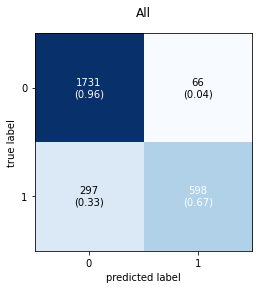

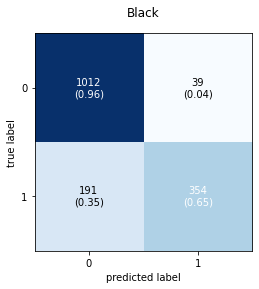

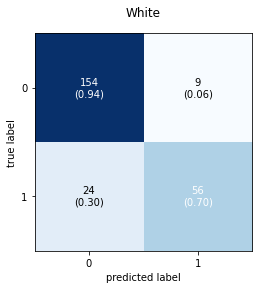

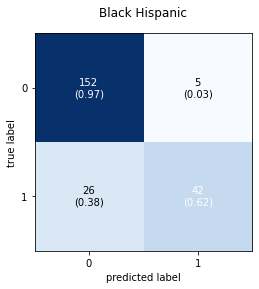

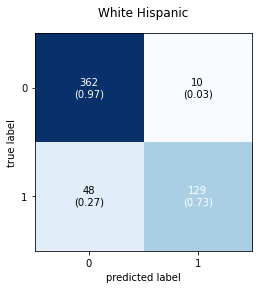

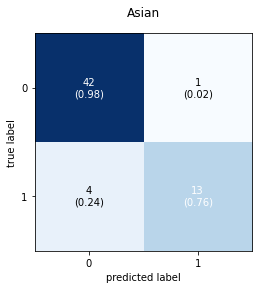

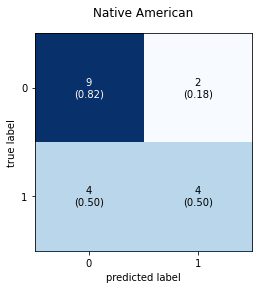

In [ ]:
from sklearn import metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

Y_test = dataY_test
Y_hat = y_hat_score

cfm = metrics.confusion_matrix(Y_test, Y_hat, labels = [1, 2])

fig, ax = plot_confusion_matrix(conf_mat=cfm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False)
ax.set_title('All') 
plt.show()


#Black


Y_test = Y_black
Y_hat = y_hat_black


cfm = metrics.confusion_matrix(Y_test, Y_hat, labels = [1, 2])
fig, ax = plot_confusion_matrix(conf_mat=cfm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False)
ax.set_title('Black') 
plt.show()


#White

Y_test = Y_white
Y_hat = y_hat_white

cfm = metrics.confusion_matrix(Y_test, Y_hat, labels = [1, 2])
fig, ax = plot_confusion_matrix(conf_mat=cfm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False)
ax.set_title('White') 
plt.show()

#Black Hispanic

Y_test = Y_black_hispanic
Y_hat = y_hat_black_his

cfm = metrics.confusion_matrix(Y_test, Y_hat, labels = [1, 2])
fig, ax = plot_confusion_matrix(conf_mat=cfm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False)
ax.set_title('Black Hispanic') 
plt.show()

#White Hispanic


Y_test = Y_white_hispanic
Y_hat = y_hat_white_his

cfm = metrics.confusion_matrix(Y_test, Y_hat, labels = [1, 2])
fig, ax = plot_confusion_matrix(conf_mat=cfm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False)
ax.set_title('White Hispanic') 
plt.show()

#Asian


Y_test = Y_asian_pacific
Y_hat = y_hat_asian_pa

cfm = metrics.confusion_matrix(Y_test, Y_hat, labels = [1, 2])
fig, ax = plot_confusion_matrix(conf_mat=cfm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False)
ax.set_title('Asian') 
plt.show()

#native americans


Y_test = Y_na_indian
Y_hat = y_hat_na_indi

cfm = metrics.confusion_matrix(Y_test, Y_hat, labels = [1, 2])
fig, ax = plot_confusion_matrix(conf_mat=cfm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False)
ax.set_title('Native American') 
plt.show()

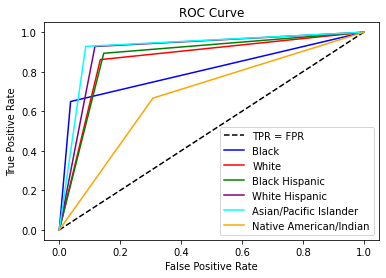

In [ ]:
#line plot

%matplotlib inline 
import matplotlib.pyplot as plt

fpr_black, tpr_black, thresholds = metrics.roc_curve(Y_black, y_hat_black, pos_label = 2)
fpr_white, tpr_white, thresholds = metrics.roc_curve(y_hat_white, Y_white, pos_label = 2)
fpr_black_his, tpr_black_his, thresholds = metrics.roc_curve(y_hat_black_his, Y_black_hispanic, pos_label = 2)
fpr_white_his, tpr_white_his, thresholds = metrics.roc_curve(y_hat_white_his, Y_white_hispanic, pos_label = 2)
fpr_asian_pa, tpr_asian_pa, thresholds = metrics.roc_curve(y_hat_asian_pa, Y_asian_pacific, pos_label = 2)
fpr_na_indi, tpr_na_indi, thresholds = metrics.roc_curve(y_hat_na_indi, Y_na_indian, pos_label = 2)


plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], 'k--', label="TPR = FPR")
plt.plot(fpr_black, tpr_black, color='blue', label="Black")
plt.plot(fpr_white, tpr_white, color='red', label="White")
plt.plot(fpr_black_his, tpr_black_his, color='green', label="Black Hispanic")
plt.plot(fpr_white_his, tpr_white_his, color='purple', label="White Hispanic")
plt.plot(fpr_asian_pa, tpr_asian_pa, color='cyan', label="Asian/Pacific Islander")
plt.plot(fpr_na_indi, tpr_na_indi, color='orange', label="Native American/Indian")

plt.legend()
plt.show()




---
# ***Things to Note...***
"Trash in, trash out" - unknown

## Data Quality Issues
> ### **Representativeness**:
The proportion of SQF incidents relative to the population of the state is not the same as the makeup of the state of New York. Black and Hispanic people make up an overwhelming amount of the dataset while they only make up of about 36% of the state. 
> #### **Noise and Sparse Data**: 
Looking at the original 2019 dataset, it is easy to see major data quality issues. This arises when officers and supervisors do not document and review all of their stops per their protocol ([NY Times](https://www.nytimes.com/2019/11/17/nyregion/bloomberg-stop-and-frisk-new-york.html)). Officers are more likely to record incidents properly when an arrest is made. So of the recorded stop-and-frisk incidents, the incidents that lead to an arrest are more likely to be robust in its data. This is apparent when we filter the data with respect to "SUSPECT_ARRESTED_FLAG" and a "Y" (or yes) value. Now look at the data when we filter with respect to "FRISKED_FLAG" and a "Y" value again.

## Data Bias
> #### **Population Bias**:
There are significant differences in demographics in the dataset. Of the 13,459 stops recorded, 59% were Black and 29% were Hispanic or Latinx. Less than 10% were White. See Representativeness.
> #### **Behaviorial Bias**:
Not all of the officers are reporting every one of their incidents and when they do, the quality and descriptions of the report will be different for each person. For example, while on the scene, one officer describes the suspect as "NORMAL" and another officer describes the suspect as "APPARENTLY NORMAL". The two officers described the same person, but their interpretations are slightly different. 

# What We Would Do In the Future
Timing was a significant issue and proved a major detriment to our vision of this project.
During the initial planning stage of this project, we debated over what model(s) to use and attributes we wanted to include. 

We eventually chose the logistic regression model, but the other top contender was the decision tree model. We found packages that would display the decision tree the algorithm creates. This adds a layer of transparency that we felt was integral to a project that consists of so many sensitive attributes. We decided not to implement it for the sake of time, but should we do this again in the future, the decision tree model would be the answer. 

When deciding on which columns to drop and which ones to keep, we were very interested in the "DEMEANOR_OF_PERSON_STOPPED" feature. In the preprocessing stage, we attempted to feature engineer this attribute. However, this column consisted of 1,757 variables which would have taken a significant amount of time away from the time we had left to complete the project. It would be nice to see how this feature would have affected the outcome of our model.

We also wish we could have been investigated deeper and further than time permitted. Police conduct issues is an extremely sensitive topic that cannot only be investigated with looking at the dataset pertaining to one year. We learned there is no such thing as "raw data", data exists within the context of our society. To full investigate, we need more time to draw proper conclusions. 

# Citations

**MLXtend**:

Sebastian Raschka, MLxtend: Providing machine learning and data science utilities and extensions to Python’s scientific computing stack, The Journal of Open Source Software, 3, 24, apr, 2018,The Open Journal, doi:10.21105/joss.00638, https://joss.theoj.org/papers/by/Sebastian%20Andersen, Accessed 5 Dec 2020

**SKlearn**:

scikit-learn, Scikit-learn: Machine Learning in Python, Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V. and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P. and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E., Journal of Machine Learning Research, 12, 2825--2830, 2011, https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html, Accessed 4 Dec 2020


**A Strategy to Split the dataset**:

Craig Shallahamer, Random Shuffle Strategy To Split Your Full Dataset, jun, 2020, OraPub} doi:10.21105/joss.00638}, https://blog.orapub.com/20200630/random-shuffle-strategy-to-split-your-full-dataset.html, Accessed 4 Dec 2020

**NYPD dataset**:

NYPD, “Stop, Question and Frisk Data.” Publications, Reports - NYPD, www1.nyc.gov/site/nypd/stats/reports-analysis/stopfrisk.page, Accessed 2 Dec 2020

**TLDR dataset**: 

NYPD, “Stop-and-Frisk Data.” New York Civil Liberties Union, 11 Mar. 2020, www.nyclu.org/en/stop-and-frisk-data, Accessed 4 Dec 2020

**How to handle missing values**: 

Kumar, Satyam. “7 Ways to Handle Missing Values in Machine Learning.” Medium, Towards Data Science, 2 Aug. 2020, towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e, Accessed 7 Dec 2020

**Feature Engineering**: 

“Representation: Feature Engineering &nbsp;|&nbsp; Machine Learning Crash Course.” Google, Google, developers.google.com/machine-learning/crash-course/representation/feature-engineering, Accessed 7 Dec 2020

**Create Fit Model**: 

Craig Shallahamer, Random Shuffle Strategy To Split Your Full Dataset, jun, 2020, OraPub} doi:10.21105/joss.00638}, https://blog.orapub.com/20200630/random-shuffle-strategy-to-split-your-full-dataset.html, Accessed 4 Dec 2020

**Fairness Definition**: 

Zhong, Ziyuan. “A Tutorial on Fairness in Machine Learning.” Medium, Towards Data Science, 19 June 2020, towardsdatascience.com/a-tutorial-on-fairness-in-machine-learning-3ff8ba1040cb, Accessed 8 Dec 2020

**NYPD Corruption and Misconduct data**: 

“New York City Police Department Corruption and Misconduct.” Wikipedia, Wikimedia Foundation, 1 Dec. 2020, en.wikipedia.org/wiki/New_York_City_Police_Department_corruption_and_misconduct, Accessed 8 Dec 2020

**Affects on minorities**:

Chapman, Ben, and Katie Honan. “NYPD's Stop-and-Frisk Practice Still Affects Minorities in New York City.” The Wall Street Journal, Dow Jones &amp; Company, 18 Nov. 2019, www.wsj.com/articles/nypds-stop-and-frisk-practice-still-affects-minorities-in-new-york-city-11574118605, Accessed 8 Dec 2020

**Police self prophecy**: 

“From the President: Predictive Policing: The Modernization of Historical Human Injustice.” NACDL, www.nacdl.org/Article/September-October2017-FromthePresidentPredictivePo, Accessed 9 Dec 2020

**NY census**:

“U.S. Census Bureau QuickFacts: New York.” Census Bureau QuickFacts, www.census.gov/quickfacts/NY, Accessed 9 Dec 2020
